# Life Expectancy Analysis & Modeling Using WHO, UN data

## Exploratory Data Analysis

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2023-01-29

Re:&nbsp;&nbsp;&nbsp; 

---

## Executive Summary


## Introduction

Input: Clean_LE_Data_w_Means_2.csv

Output: Clean_LE_Data_Post_EDA_3.csv

In [1]:
# Common Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
path = '../data/processed/'
filename = 'Clean_LE_Data_w_Means_2.csv'

df = pd.read_csv(path+filename,header=0)

# Convert Dev status to a string variable, {Developing, Developed}.
df['Status'] = df['Status'].apply(lambda x: 'Developing' if x == 0 else 'Developed').astype('category')

print(f'\nFile "{filename}" has ',
      df.shape[0], 'observations &', df.shape[1], 'features.\n')

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/Clean_LE_Data_w_Means_2.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         2928 non-null   object  
 1   Year            2928 non-null   int64   
 2   Status          2928 non-null   category
 3   LifeExpectancy  2928 non-null   float64 
 4   AdultMort       2928 non-null   float64 
 5   InfD            2928 non-null   int64   
 6   EtOH            2928 non-null   float64 
 7   PercExpen       2928 non-null   float64 
 8   Measles         2928 non-null   int64   
 9   BMI             2928 non-null   float64 
 10  lt5yD           2928 non-null   int64   
 11  Polio           2928 non-null   float64 
 12  TotalExpen      2928 non-null   float64 
 13  DTP             2928 non-null   float64 
 14  HIV             2928 non-null   float64 
 15  Thin1_19y       2928 non-null   float64 
 16  Thin5_9y        2928 non-null   float64 
 17  Income        

## Descriptive statistics of np.numeric data

In [ ]:
df.describe(include=[np.number], percentiles=[0.5]).T

,count,mean,std,min,50%,max
Year,2928.0,2007.500000,4.610560,2000.00,2007.500000,2015.00000
LifeExpectancy,2928.0,69.224932,9.523867,36.30,72.100000,89.00000
AdultMort,2928.0,164.796448,124.292079,1.00,144.000000,723.00000
InfD,2928.0,30.407445,118.114450,0.00,3.000000,1800.00000
EtOH,2928.0,4.614856,3.914923,0.01,4.160000,17.87000
PercExpen,2928.0,740.321185,1990.930605,0.00,65.611455,19479.91161
Measles,2928.0,2427.855874,11485.970937,0.00,17.000000,212183.00000
BMI,2928.0,38.235394,19.850184,1.00,43.000000,77.60000
lt5yD,2928.0,42.179303,160.700547,0.00,4.000000,2500.00000
Polio,2928.0,82.548298,23.340548,3.00,93.000000,99.00000


## Counts of 'Country' object data

In [ ]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Country,2928,183,Afghanistan,16
Status,2928,2,Developing,2416


## Visualizing life expectancy for 193 countries 

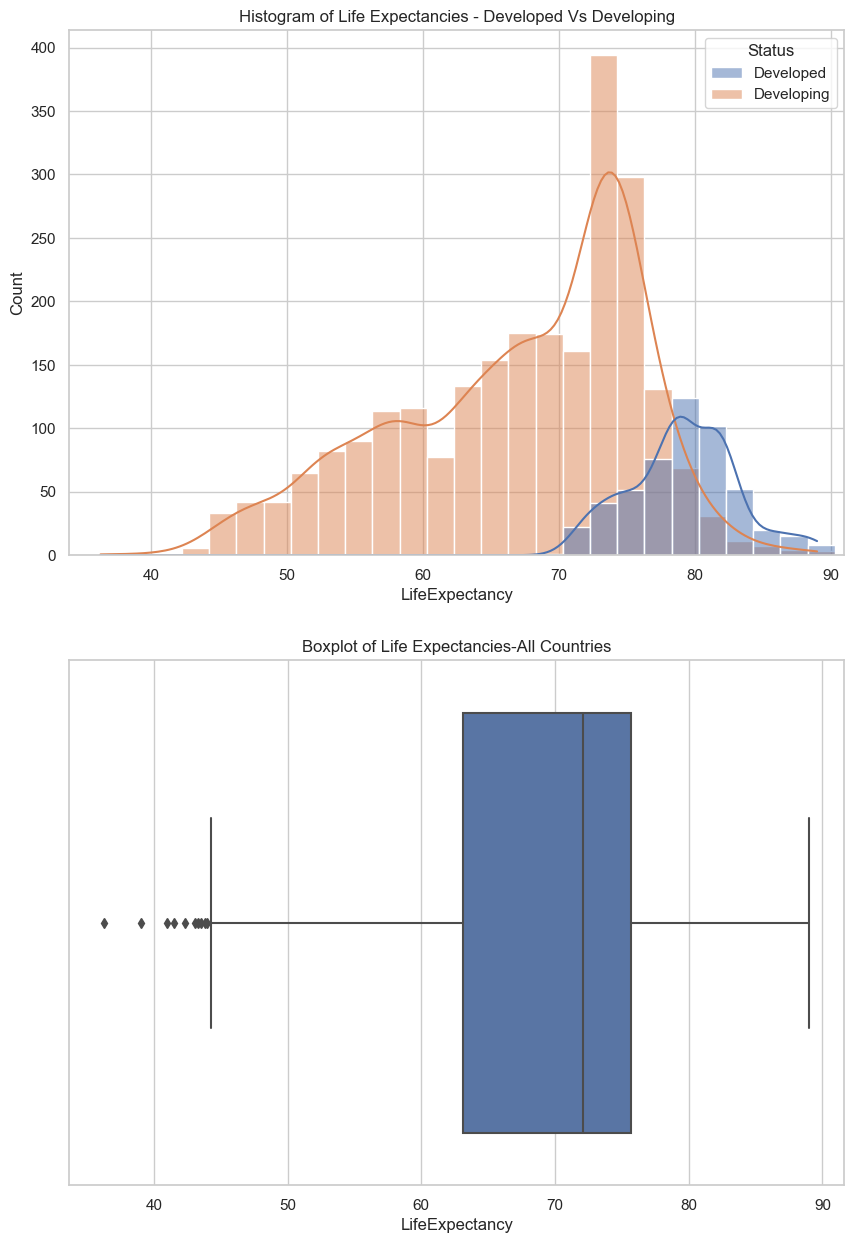

In [66]:
# Histogram and Boxplot of Life Expectancy

plt.figure(figsize=(10,15))
sns.set_theme(style="whitegrid")

plt.subplot(2, 1, 1)
plt.title('Histogram of Life Expectancies - Developed Vs Developing')
sns.histplot(data=df, x='LifeExpectancy', binwidth=2, kde=True, hue='Status')
plt.xlim(34, 91)
#plt.savefig('../data/assets/Histogram_Life_Expectancies_All_Countries.png')

plt.subplot(2, 1, 2)
plt.title('Boxplot of Life Expectancies-All Countries')
sns.boxplot(x=df['LifeExpectancy'])

plt.show()

### NOTE 1: Inference

|                 | Mean | Median | Standard Deviation |    Skew | Kutosis |
|----------------:|-----:|-------:|-------------------:|--------:|--------:|
| Life Expectancy | 69.2 |	  72.1 |               9.52 | -0.6386 | -0.2345 |

- When Kurtosis is less than zero, the distribution is wider than the standard normal, and has thinner tails than the standard normal curve. 

- Simply, this means that more data is located near the mean and less at the extremes.

1. **Skewness= -0.6386047359** 


2. **Kurtosis = -0.2344773942**
   - Whenever the Kurtosis is less than zero or negative, it refers to distributions that are wider than the standard normal. It also refers to distributions that have thinner tails than the standard normal curve. This simply means that more data values are located near the mean and less data values are located at the extremes.    
 
  
3. The Life Expectancy between "*developing nations*" and "*developed nations*" has mean (**69.2 y**) and the median (**72.1 y**) are not appreciably different.  


In [68]:
import plotly.express as px

plt.figure(figsize=(12, 8))
fig = px.violin(df, y="LifeExpectancy",
                color="Status",
                box=True,
                points="all",
                hover_data=df.columns
                )

fig.update_layout(margin=dict(l=20, r=20, t=40, b=10),
                  paper_bgcolor="Lightyellow",
                  title='Violin Plots of Developing Vs Developed Nation Status'
                  )

fig.show()


<Figure size 1200x800 with 0 Axes>

## Drop Highly Correlated Features

The *WHO Life Expecteancy: IDA_EDA_Report* found six variables were highly correlated.

| Variables | Correlation |
|:----------|------------:|
| (InfD) Infant Death & (lt5yD) Number of less than 5yr deaths | 0.997 |
| Thinness at 1-19yr & Thinness at 5-9yr | 0.939 |
| Perc_Expen & GDP | 0.899 |

- Since GDP was dropped due to 22% missing values ANY comparsion IS NOT Necessary

- In order to determine which ones to remove, we will compare the correlations after each removal.

- It is reccommened that removing descriptors with absolute correlations above 0.75 is done by a 'bake-off' method, for reference, see [Max Kuhn](https://topepo.github.io/caret/pre-processing.html#identifying-correlated-predictors)

- BTW, my co-worker Peter Brown used the 'bake-off' idea alot when doing scientific comparisons, but I don't think anyone will ever care or read this far.


https://topepo.github.io/caret/pre-processing.html#identifying-correlated-predictors

### Compare Correlation coeff of (InfD) Infant Death Vs. (lt5yD) Number of less than 5yr deaths 

In [ ]:
# Use: `Clean_LE_Data_w_Means_2.csv`

filename = 'Clean_LE_Data_w_Means_2.csv'

df = pd.read_csv(filename, header=0)


In [ ]:
# Generate Corr Coeff for InfD vs LifeExpectancy

np.corrcoef(df['InfD'], df['LifeExpectancy'])


In [ ]:
# Generate Corr Coeff for lt5yD vs LifeExpectancy

np.corrcoef(df['lt5yD'], df['LifeExpectancy'])


### NOTE 5:

- The correlation of `lt5yd` = -0.22252912

- The correlation of `InfD` = -0.19655718

- Therefore DELETE `InfD`

### Compare Correlation coeff of (Thin1_19y) Thinness at 1-19yr & (Thin5_9y) Thinness at 5-9yr

In [ ]:
np.corrcoef(df['Thin1_19y'], df['LifeExpectancy'])


In [ ]:
np.corrcoef(df['Thin5_9y'], df['LifeExpectancy'])


### NOTE 6:
- The correlation of `Thin1_19y` = -0.47277841

- The correlation of `Thin5_9y` = -0.46723051

- Therefore DELETE `Thin5_9y`

In [ ]:
# Drop TWO Features

df.drop(['Thin5_9y', 'InfD'], axis=1, inplace=True)


## Save Intermediate dataframe

In [ ]:
path = ''
fileName = 'Clean_LE_Data_Post_EDA_3.csv'


df.to_csv("Clean_LE_Data_Post_EDA_3.csv", index=False)
